In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

npz is NumPy's file type, stores n-dimensional arrays ... tensors can be represented as multi-dimensional arrays

**SOLVING WITH TF**

In [3]:
training_data = np.load("TF_intro.npz")

In [4]:
input_size = 2
output_size = 1

When employing TF we build the model ourselves

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
    # Dense calculates dot product of inputs and weights, adds bias 
    #Here, kernel means weight
])

Sequential indicates that we are 'laying down' the model, how many layers?

In [6]:
custom_optimizer = tf.keras.optimizers.SGD(0.2)
#SGD optimizer, learning rate etc.

In [7]:
model.compile(optimizer=custom_optimizer, loss="mean_squared_error")

In [8]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 132.4535
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 21.7216
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 17.9339
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 15.8181
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 13.9648
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 12.3102
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 10.8977
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 9.6168
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 8.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.5202
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 6.6512
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8978
Epoch 13/100
32/32 [=========

**Extract the weights and bias**

In [9]:
model.layers[0].get_weights()

[array([[ 1.9954962],
        [-2.996835 ]], dtype=float32), array([4.9663367], dtype=float32)]

In [10]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9954962],
       [-2.996835 ]], dtype=float32)

In [11]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9663367], dtype=float32)

**Extract the outputs (make predictions)**

In [12]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  0.4],
       [ 27.4],
       [  0.1],
       [  7.3],
       [-10.1],
       [ -4.2],
       [ 42.8],
       [-33.1],
       [ 20.2],
       [-26.4],
       [ 14.2],
       [ 21.6],
       [ 10.5],
       [ 14.2],
       [ -4.5],
       [-17.2],
       [ -6.5],
       [  4.7],
       [  4.8],
       [ 41.6],
       [-36.8],
       [-27.8],
       [-21.8],
       [  0.2],
       [-35.3],
       [  8.2],
       [ 19.8],
       [ 10.2],
       [  5.2],
       [  1.3],
       [-32.5],
       [  1.6],
       [-20. ],
       [ 43.5],
       [ -5.7],
       [ 13.1],
       [ 16.7],
       [-10.6],
       [ -7.4],
       [ 25.8],
       [ 26.3],
       [  8.1],
       [-24. ],
       [ 20.2],
       [-16.3],
       [ -7.4],
       [-15. ],
       [ 12.4],
       [ 22.3],
       [ -5.1],
       [  0.2],
       [  6.1],
       [ 30.1],
       [  4.7],
       [  8.7],
       [  2. ],
       [-13.6],
       [-14.7],
       [ 16.6],
       [ 21.5],
       [  6. ],
       [ 31. ],
       [

In [15]:
training_data['targets'].round(1)

array([[  1.2],
       [ 28.3],
       [ -0.5],
       [  7. ],
       [-10.5],
       [ -3.6],
       [ 42.9],
       [-33.1],
       [ 21.2],
       [-25.9],
       [ 14.1],
       [ 21.7],
       [ 10.2],
       [ 15.2],
       [ -5.2],
       [-17.3],
       [ -6. ],
       [  4. ],
       [  4.7],
       [ 42.3],
       [-36.2],
       [-27.7],
       [-21.1],
       [  1. ],
       [-35.1],
       [  7.4],
       [ 20. ],
       [ 10.5],
       [  5.6],
       [  0.7],
       [-31.6],
       [  2.1],
       [-19.1],
       [ 44.5],
       [ -5.4],
       [ 13.5],
       [ 17.6],
       [ -9.8],
       [ -7.6],
       [ 25.7],
       [ 26. ],
       [  8.6],
       [-24.3],
       [ 21.1],
       [-16.4],
       [ -8. ],
       [-15.6],
       [ 11.6],
       [ 21.5],
       [ -5.3],
       [ -0.4],
       [  6. ],
       [ 30.2],
       [  4. ],
       [  8.2],
       [  2.2],
       [-13.2],
       [-15.3],
       [ 17.6],
       [ 21.6],
       [  6.5],
       [ 31.1],
       [

**Plot the data**


Text(0, 0.5, 'Inputs')

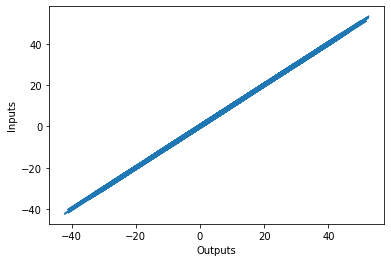

In [16]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Inputs')